In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognization/train.csv
/kaggle/input/digit-recognization/test.csv


# Import Libraries

In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

print(" Libraries imported successfully.")


 Libraries imported successfully.


# Load the data

In [14]:
test = pd.read_csv("/kaggle/input/digit-recognization/test.csv")
train = pd.read_csv("/kaggle/input/digit-recognization/train.csv")
print("Training Data Shape",train.shape)
print("Test Data Shape",test.shape)
train.head()

Training Data Shape (42000, 785)
Test Data Shape (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Prepare and preprocess data

In [15]:
X = train.drop("label", axis=1).values
y = train["label"].values

# Normalize (0–1 range)
X = X / 255.0
test = test / 255.0

# Reshape for CNN input
X = X.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

# One-hot encode labels
y = to_categorical(y, num_classes=10)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)


Training set: (37800, 28, 28, 1)
Validation set: (4200, 28, 28, 1)


# Visualize sample digits

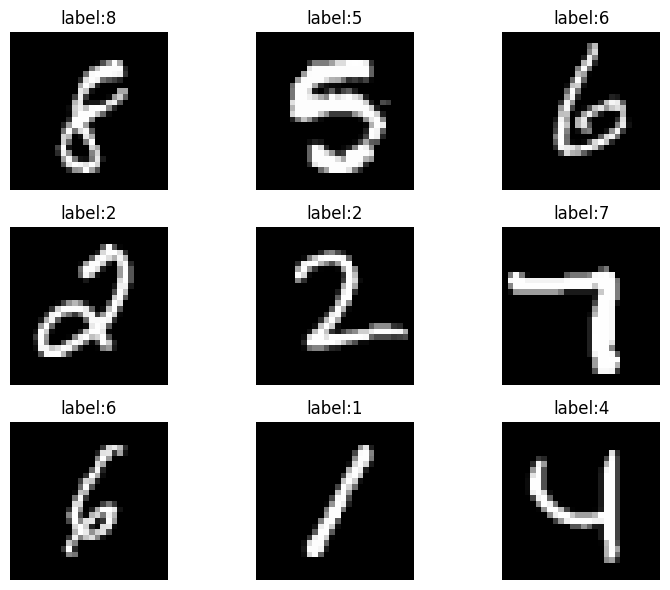

In [16]:
plt.figure(figsize=(8,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.title(f"label:{np.argmax(y_train[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

#  Build CNN model

In [17]:
model = Sequential([
    Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)),
    Conv2D(32,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=2),
    Dropout(0.25),
    
    Conv2D(64,kernel_size=3,activation='relu'),
    Conv2D(64,kernel_size=3,activation='relu'),
    MaxPooling2D(pool_size=1),
    Dropout(0.25),

    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,116,394 (4.26 MB)

 Trainable params: 1,116,394 (4.26 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and train

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(X_val, y_val)
)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


591/591 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7141 - loss: 0.8498 - val_accuracy: 0.9833 - val_loss: 0.0506
Epoch 2/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9531 - loss: 0.1581 - val_accuracy: 0.9888 - val_loss: 0.0374
Epoch 3/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9657 - loss: 0.1132 - val_accuracy: 0.9905 - val_loss: 0.0290
Epoch 4/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9723 - loss: 0.0920 - val_accuracy: 0.9905 - val_loss: 0.0317
Epoch 5/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9776 - loss: 0.0763 - val_accuracy: 0.9902 - val_loss: 0.0303
Epoch 6/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9775 - loss: 0.0735 - val_accuracy: 0.9926 - val_loss: 0.0226
Epoch 7/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9806 - loss: 0.0654 - val_accuracy: 0.9919 - val_loss: 0.0245
Epoch 8/15
591/591 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9823 - loss: 0.0589 - val_accurac

#  Evaluate performance

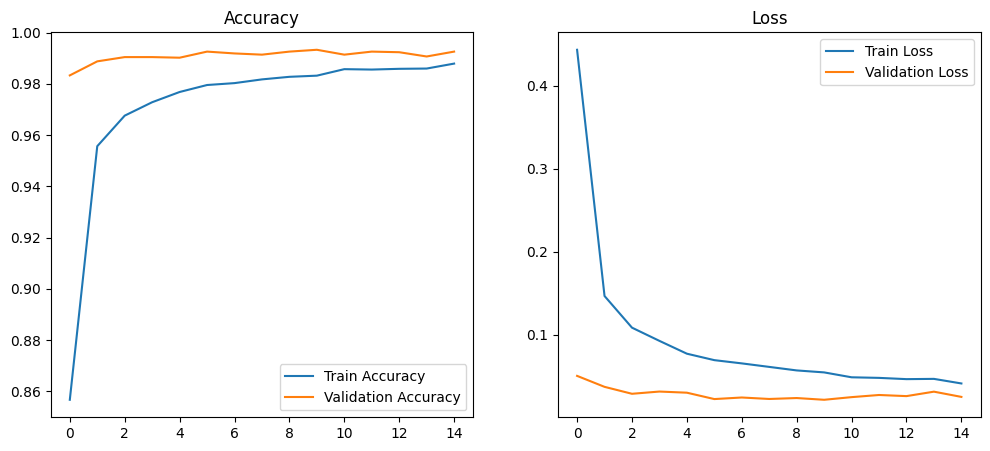

 Final Training Accuracy: 98.79%
 Final Validation Accuracy: 99.26%


In [19]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f" Final Training Accuracy: {final_train_acc * 100:.2f}%")
print(f" Final Validation Accuracy: {final_val_acc * 100:.2f}%")

#  Predict on test data

In [20]:
predictions = model.predict(test)
predicted_labels = np.argmax(predictions, axis=1)


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


#  Save trained model

In [21]:
model.save("mnist_cnn_model.h5")
print(" Model saved as mnist_cnn_model.h5")


 Model saved as mnist_cnn_model.h5
